In [1]:
import pandas as pd

summer_df = pd.read_csv("../Data/olympics/summer.csv")

In [2]:
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
summer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
summer_df[summer_df.isnull().values]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [5]:
summer_df.drop(summer_df[summer_df.isnull().values].index, inplace=True)
summer_df[summer_df.isnull().values]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [6]:
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [7]:
summer_df['Medal'].value_counts()

Gold      10484
Bronze    10369
Silver    10308
Name: Medal, dtype: int64

In [8]:
import matplotlib.pyplot as plt

summer_df['Medal'].value_counts().to_frame().plot(kind="pie", y="Medal", figsize=(8, 8), autopct='%1.1f%%', legend=False, 
                                                  title="Medals")
ax = plt.gca()
ax.set_ylabel('')
plt.show()

<Figure size 800x800 with 1 Axes>

In [9]:
summer_df['Athlete'] = summer_df['Athlete'].str.split(',').str[::-1].str.join(' ').str.title()
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [10]:
summer_df['City'].value_counts().to_frame()

,City
London,3563
Athens,2149
Los Angeles,2074
Beijing,2042
Sydney,2015
Atlanta,1859
Barcelona,1705
Seoul,1546
Paris,1396
Moscow,1387


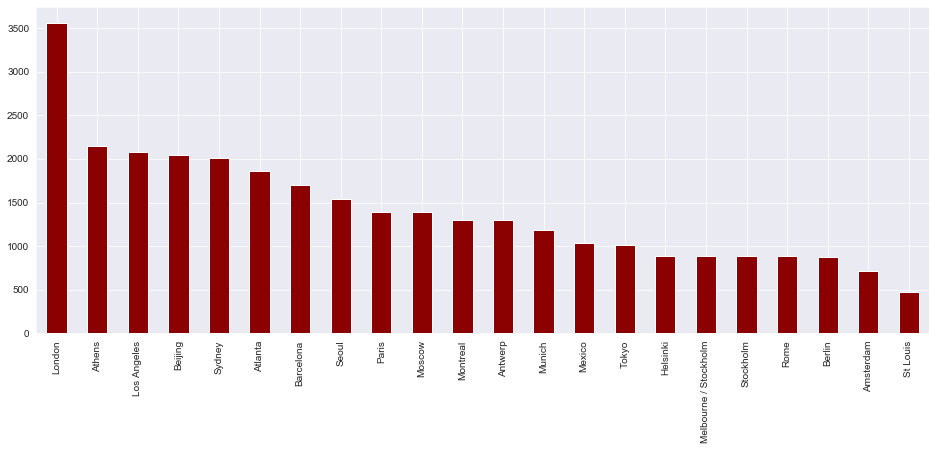

In [11]:
import seaborn as sns

sns.set_style('darkgrid')
summer_df['City'].value_counts().to_frame().plot(kind="bar", figsize=(16, 6), legend=False, color="darkred")
plt.show()

<font size="4">Best Athletes</font>

In [12]:
summer_df_men = summer_df[summer_df['Gender'] == 'Men']
summer_df_women = summer_df[summer_df['Gender'] == 'Women']
summer_df_women['Gender'].value_counts()

Women    8417
Name: Gender, dtype: int64

In [13]:
best_men = summer_df_men.groupby('Athlete')['Gender'].count().nlargest(1).to_frame().index[0].strip()
best_men_medal = summer_df_men.groupby('Athlete')['Gender'].count().nlargest(1)[0]

best_women = summer_df_women.groupby('Athlete')['Gender'].count().nlargest(1).to_frame().index[0].strip()
best_women_medal = summer_df_women.groupby('Athlete')['Gender'].count().nlargest(1)[0]
best_women_medal

18

In [14]:
print("Best man and woman athletes:", best_men, "and", best_women)
print("Their medal count:", best_men_medal, ",", best_women_medal)

Best man and woman athletes: Michael Phelps and Larisa Latynina
Their medal count: 22 , 18


In [15]:
summer_df['Gender'].value_counts().to_frame()

,Gender
Men,22744
Women,8417


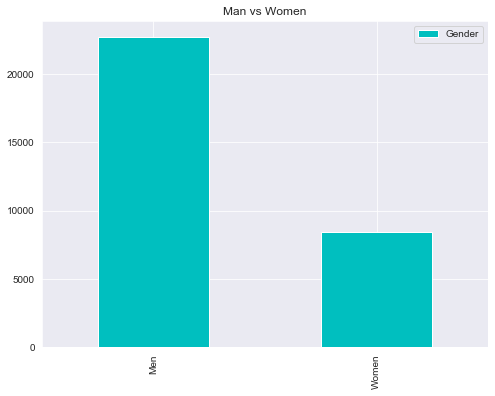

In [16]:
summer_df['Gender'].value_counts().to_frame().plot(kind="bar", figsize=(8, 6), color='c', title="Man vs Women")
plt.show()

In [17]:
country_df = pd.read_csv("../Data/olympics/dictionary.csv")
country_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [18]:
summer_df = summer_df.merge(country_df, how='left', left_on='Country', right_on='Code')
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578


In [19]:
summer_df.drop(['Country_x', 'Code'], axis=1, inplace=True)
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Country_y,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174


In [20]:
summer_df.rename({'Country_y': 'Country'}, axis='columns', inplace=True)
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174


In [21]:
medal_by_country = summer_df.groupby('Country')['Gender'].count().nlargest(10).to_frame()
medal_by_country

,Gender
Country,
United States,4585
United Kingdom,1720
France,1396
Germany,1305
Italy,1296
Australia,1189
Hungary,1079
Sweden,1044
Netherlands,851


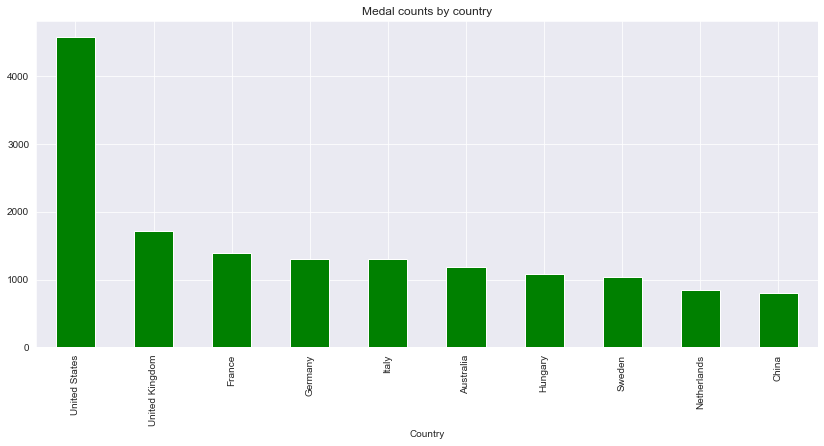

In [22]:
medal_by_country.plot(kind="bar", figsize=(14, 6), legend=False, color='g', title="Medal counts by country")
plt.show()

In [23]:
top_10 = summer_df[summer_df['Country'].isin(medal_by_country.index)]
top_10 = top_10.groupby(['Country', 'Medal'])['Gender'].count().reset_index()
top_10.head(3)

,Country,Medal,Gender
0,Australia,Bronze,472
1,Australia,Gold,312
2,Australia,Silver,405


In [24]:
top_10 = top_10.pivot('Country', 'Medal', 'Gender')
top_10

Medal,Bronze,Gold,Silver
Country,,,
Australia,472,312,405
China,221,290,296
France,497,408,491
Germany,475,452,378
Hungary,351,412,316
Italy,404,476,416
Netherlands,339,233,279
Sweden,328,349,367
United Kingdom,553,546,621


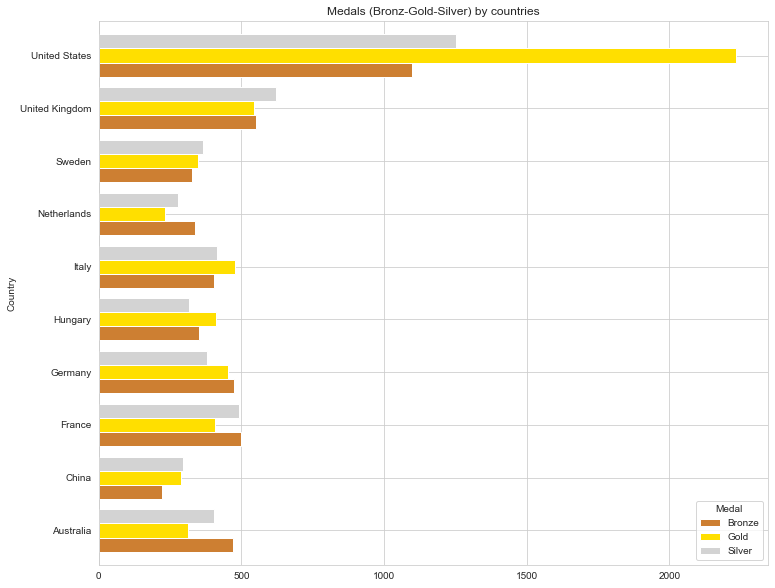

In [25]:
sns.set_style('whitegrid')
top_10.plot(kind="barh", figsize=(12, 10), title="Medals (Bronz-Gold-Silver) by countries", 
            color=['#CD7F32','#FFDF00','#D3D3D3'], width=0.8)
plt.show()

In [26]:
medal_by_country.head(5)

,Gender
Country,
United States,4585
United Kingdom,1720
France,1396
Germany,1305
Italy,1296


In [27]:
top_10_by_year = summer_df[summer_df['Country'].isin(medal_by_country.head(5).index)]
top_10_by_year = top_10_by_year.groupby(['Country', 'Year'])['Gender'].count().reset_index()
top_10_by_year = top_10_by_year.pivot('Year', 'Country', 'Gender')
top_10_by_year

Country,France,Germany,Italy,United Kingdom,United States
Year,,,,,
1896,11.0,33.0,NaN,7.0,20.0
1900,185.0,40.0,4.0,78.0,55.0
1904,NaN,13.0,NaN,2.0,394.0
1908,35.0,22.0,7.0,347.0,63.0
1912,25.0,52.0,21.0,160.0,101.0
1920,141.0,NaN,84.0,107.0,193.0
1924,122.0,NaN,51.0,66.0,198.0
1928,36.0,72.0,70.0,55.0,84.0
1932,37.0,38.0,77.0,34.0,181.0


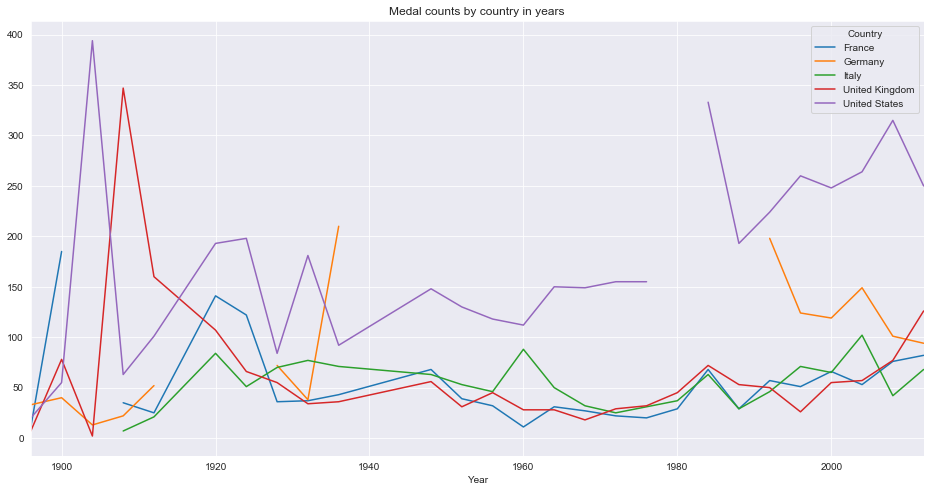

In [28]:
sns.set_style('darkgrid')
top_10_by_year.plot(figsize=(16, 8), title="Medal counts by country in years")
plt.show()

In [29]:
country_by_medal = summer_df.groupby('Country')['Gender'].count().reset_index()
country_by_medal.head()

,Country,Gender
0,Afghanistan,2
1,Algeria,15
2,Argentina,259
3,Armenia,11
4,Australia,1189


In [30]:
country_by_medal = country_by_medal.merge(country_df, how='left', left_on='Country', right_on='Country').drop('Code', 
                                                                                                              axis=1)
country_by_medal = country_by_medal.rename({'Gender': 'Medal Count'}, axis=1)
country_by_medal.head()

,Country,Medal Count,Population,GDP per Capita
0,Afghanistan,2,32526562.0,594.323081
1,Algeria,15,39666519.0,4206.031232
2,Argentina,259,43416755.0,13431.878340
3,Armenia,11,3017712.0,3489.127690
4,Australia,1189,23781169.0,56310.962993


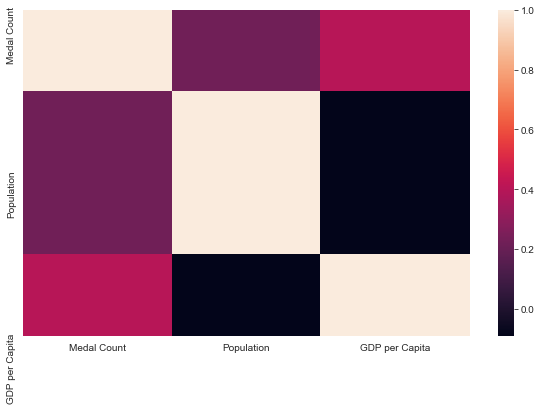

In [31]:
corr = country_by_medal.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

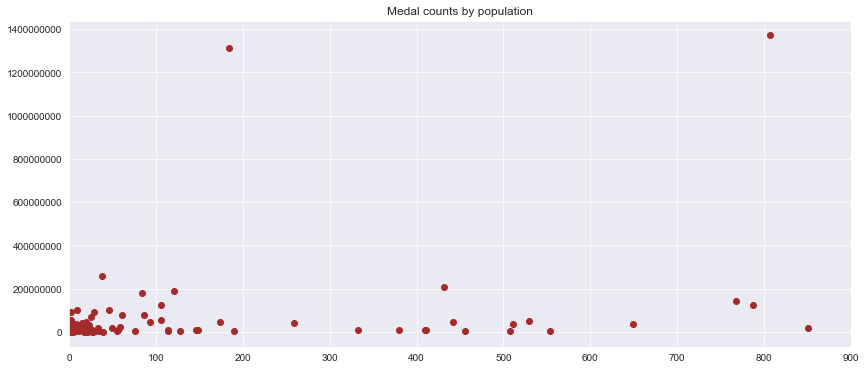

In [32]:
plt.figure(figsize=(14, 6))
plt.title("Medal counts by population")
plt.scatter(country_by_medal['Medal Count'], country_by_medal['Population'], color='brown')
plt.xlim(0, 900)
plt.ticklabel_format(style='plain')
plt.show()

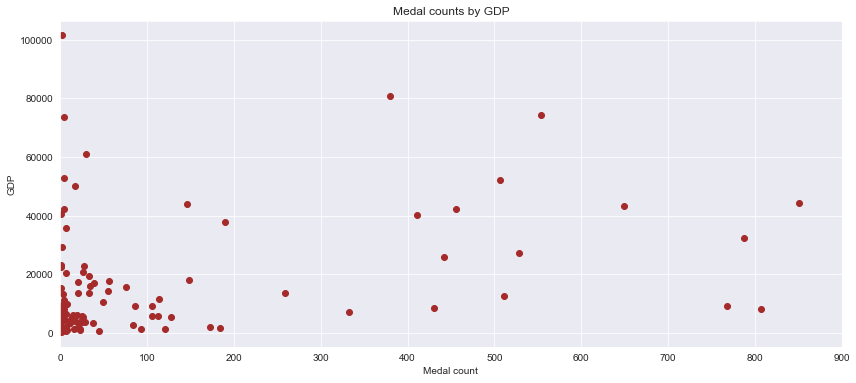

In [33]:
plt.figure(figsize=(14, 6))
plt.title("Medal counts by GDP")
plt.scatter(country_by_medal['Medal Count'], country_by_medal["GDP per Capita"], color='brown')
plt.xlim(0, 900)
plt.ticklabel_format(style='plain')
plt.xlabel("Medal count")
plt.ylabel("GDP")
plt.show()

<b>Same steps could be applied to winter olympics dataframe</b>

In [34]:
winter_df = pd.read_csv("../Data/olympics/winter.csv")
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
